In [34]:
import numpy as np
from scipy import linalg as LA
import scipy.sparse.linalg as spla
from scipy import optimize as OPT
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm 
from latex_envs.latex_envs import figcaption
from scipy.special import binom as bm
from sympy.physics.quantum.cg import CG
import numpy.matlib
#import chardet
import os
import mod_LMG_v1 as LMG
import h5py
#for Latex font on figures
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Roman']})
rc('text', usetex=True)

## Critical to Critical Quench

In [132]:
#parameter definitions
#L=9000 #Set system size.
Larr=np.concatenate([np.array([100,200,300,400,500,600,700,800,900]),np.array([1000,2000,3000,4000,5000,6000,7000,8000,9000])])
dt=0.2 #time step
Tf=20. # final time step
Nsteps=int(Tf/dt) 
tarr=np.arange(dt,Tf+dt,dt) #for calculating <Sϕ(t)Sϕ(t)>
t1arr=np.array([15.])
t2arr=np.arange(10,25+dt,dt)
Azf=0.
Ayf=1.

In [133]:
#Plot <Sϕ(t)Sϕ(t)> load from file.
directory1='data/Sϕ2t/'
directory2='/home/paraj/Dropbox/Research_Projects_Current/LMG_Quench/data/Sϕ2t/'
directory3='data/Sz2t/'
directory4='/home/paraj/Dropbox/Research_Projects_Current/LMG_Quench/data/Sz2t/'
Sϕ2vals=np.zeros((Nsteps,np.size(Larr)))
Mϕ2vals=np.zeros((Nsteps,np.size(Larr)))
Mϕ2vals_scaled=np.zeros((Nsteps,np.size(Larr)))
Sy2vals=np.zeros((Nsteps,np.size(Larr)))
Sz2vals=np.zeros((Nsteps,np.size(Larr)))
deletelist=np.array([],dtype=int)
for L,p in zip(Larr,range(np.size(Larr))):
    print('L='+str(L), end='\r', flush=True)
    paramvals0=LMG.Ham_params(N=L,S=L/2,J=1.,γz=1.,γy=0.,Γ=1.)
    paramvalsf=LMG.Ham_params(N=L,S=L/2,J=1.,γz=0.,γy=1.,Γ=1.)
    #load Sz^2 data
    filename1=directory2+'Sϕ2t_Az_1.0_Ay_0.0_[0_'+str(dt)+'_'+str(dt*Nsteps)+']_from_'+paramvals0.paramstr()+'_to_'+paramvalsf.paramstr()+'.hdf5'
    #load Sy^2 data
    filename2=directory2+'Sϕ2t_Az_0.0_Ay_1.0_[0_'+str(dt)+'_'+str(dt*Nsteps)+']_from_'+paramvals0.paramstr()+'_to_'+paramvalsf.paramstr()+'.hdf5'
    if (not os.path.exists(filename1)) or (not os.path.exists(filename2)):
        print("L="+str(L)+" data doesn't exist!")
        deletelist=np.append(deletelist,int(p))
    else:
        #print("Loading files:\n "+filename1+"\n"+filename2)
        with h5py.File(filename1, "r") as f:
            Sz2arr= f["Sϕ2arr"][...]
            InitState=f["InitState"][...]
        with h5py.File(filename2, "r") as f:
            Sy2arr= f["Sϕ2arr"][...]
            InitState=f["InitState"][...]
        Sϕ2vals[:,p]=Sz2arr+Sy2arr
        Mϕ2vals[:,p]=(Sz2arr+Sy2arr)*4/L**2
        Sz2vals[:,p]=Sz2arr
        Sy2vals[:,p]=Sy2arr
Sϕ2vals_nonzero=np.delete(Sϕ2vals,deletelist,axis=1)
Mϕ2vals_nonzero=np.delete(Mϕ2vals,deletelist,axis=1)
Mϕ2vals_scaled_nonzero=np.delete(Mϕ2vals_scaled,deletelist,axis=1)
Sy2vals_nonzero=np.delete(Sy2vals,deletelist,axis=1)
Sz2vals_nonzero=np.delete(Sz2vals,deletelist,axis=1)
Larr_nonzero=np.delete(Larr,deletelist,axis=0)

L=800 data doesn't exist!
L=2000 data doesn't exist!
L=6000 data doesn't exist!


In [76]:
filename1

'/home/paraj/Dropbox/Research_Projects_Current/LMG_Quench/data/Sϕ2t/Sϕ2t_Az_1.0_Ay_0.0_[0_0.2_20.0]_from_L_9000,S_4500.0,J_1.0,Γ_4.0,γz_1.0,γy_0.0_to_L_9000,S_4500.0,J_1.0,Γ_1.0,γz_1.0,γy_0.0.hdf5'

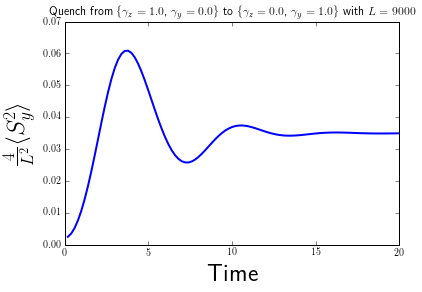

In [105]:
#plotting
plt.plot(tarr,Sϕ2vals_nonzero[:,-1]*(4/Larr[-1]**2),'-',color='blue',linewidth=2,label='$\\langle S_z^2(t)+ S_y^2(t)\\rangle$')
#plt.plot(tarr,Sz2vals_nonzero,'-',color='black',linewidth=2,label='$\\langle S_z^2(t)\\rangle$')
#plt.plot(tarr,Sy2vals_nonzero,'-',color='red',linewidth=2,label='$\\langle S_y^2(t)\\rangle$')
#plt.plot(np.linspace(0,Tf,1000),Szt,color='blue',label='Holstein-Primakoff',linewidth=1.5)
#plt.axhline(Sz2inf,linestyle='dashed',color= 'black',label='$t=\\infty$ avg',linewidth=2)
plt.xlabel("Time",fontsize=25)
plt.ylabel("$\\frac{4}{L^2}\\langle S_y^2\\rangle$",fontsize=25)#"+S_y^2\\rangle$",fontsize=25)
plt.xlim(0,tarr[-1])
#plt.ylim()
#plt.legend(numpoints=1,loc=1,fontsize=15)#bbox_to_anchor=(1.5,1))
plt.title('Quench from \\{$\\gamma_z= %.1f $, $\\gamma_{y}= %.1f $\\} to \\{$\\gamma_z= %.1f $, $\\gamma_{y}= %.1f $\\} with $L=%d$'%(paramvals0.γz,paramvals0.γy, paramvalsf.γz,paramvalsf.γy,L))
figname='/home/paraj/Dropbox/Research_Projects_Current/LMG_Quench/plots/For_Mohammad/Syt_[0_'+str(dt)+'_'+str(Tf)+']_from_'+paramvals0.paramstr()+'to'+paramvalsf.paramstr()+'.pdf'

plt.savefig(figname,bbox_inches="tight")

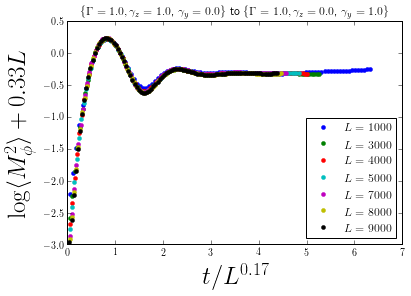

In [114]:
#plt.plot(tarr,Mϕ2vals_nonzero,'-',linewidth=2,label='$\\langle S_z^2(t)+ S_y^2(t)\\rangle$')
mϕ=1/3#0.36
mt=1/6#0.18
for L,p in zip(Larr_nonzero,range(np.size(Larr_nonzero))):
    plt.plot(tarr/L**mt,np.log(Mϕ2vals_nonzero[:,p])+mϕ*np.log(L),'.',markersize=8,linewidth=2,label='$L=%d$'% L)
plt.xlabel("$t/L^{ %0.2f } $"% mt,fontsize=25)
plt.ylabel("${\\rm log}\\langle M^2_\\phi \\rangle+ %0.2f {\\rmlog}L$"% mϕ,fontsize=25)
plt.legend(loc=4,numpoints=1)
plt.title(' \\{$\Gamma=%.1f, \\gamma_z= %.1f $, $\\gamma_{y}= %.1f $\\} to \\{$\\Gamma=%.1f, \\gamma_z= %.1f $, $\\gamma_{y}= %.1f $\\}'%(paramvals0.Γ,paramvals0.γz,paramvals0.γy, paramvalsf.Γ,paramvalsf.γz,paramvalsf.γy))

figname='/home/paraj/Dropbox/Research_Projects_Current/LMG_Quench/plots/For_Mohammad/Scaled_Sϕt_[0_'+str(dt)+'_'+str(Tf)+']_from_'+paramvals0.paramstr()+'to'+paramvalsf.paramstr()+'.pdf'

plt.savefig(figname,bbox_inches="tight")

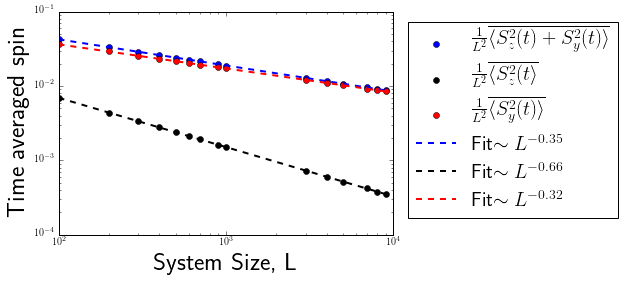

In [135]:
##numerical formulae for time-averaged value
Sϕtavg=np.mean(Sϕ2vals_nonzero, axis=0)
Sytavg=np.mean(Sy2vals_nonzero, axis=0)
Sztavg=np.mean(Sz2vals_nonzero, axis=0)
#linear fit to data
logSϕ=np.log10(np.divide(Sϕtavg,Larr_nonzero**2))
logSy=np.log10(np.divide(Sytavg,Larr_nonzero**2))
logSz=np.log10(np.divide(Sztavg,Larr_nonzero**2))
logL=np.log10(Larr_nonzero)
mϕ,bϕ = np.polyfit(logL,logSϕ, 1)
my,by = np.polyfit(logL,logSy, 1)
mz,bz = np.polyfit(logL,logSz, 1)

#Plot average magnetization as a function of L

#plt.loglog(Larr,np.divide(np.abs(Sz2infarr-Sztavg),(Sz2infarr)),'o')
plt.figure()
plt.loglog(Larr_nonzero,np.divide(Sϕtavg,Larr_nonzero**2),'bo',label='$\\frac{1}{L^2}\\overline{\\langle S_z^2(t)+ S_y^2(t)\\rangle}$')
plt.loglog(Larr_nonzero,np.divide(Sztavg,Larr_nonzero**2),'ko',label='$\\frac{1}{L^2}\\overline{\\langle S_z^2(t\\rangle}$')
plt.loglog(Larr_nonzero,np.divide(Sytavg,Larr_nonzero**2),'ro',label='$\\frac{1}{L^2}\\overline{\\langle S_y^2(t)\\rangle}$')
plt.loglog(Larr_nonzero,(10**bϕ)*(Larr_nonzero)**mϕ,'--',color='blue',linewidth=2,label='Fit$\\sim L^{%0.2f}$' % mϕ)
plt.loglog(Larr_nonzero,(10**bz)*(Larr_nonzero)**mz,'--',color='black',linewidth=2,label='Fit$\\sim L^{%0.2f}$' % mz)
plt.loglog(Larr_nonzero,(10**by)*(Larr_nonzero)**my,'--',color='red',linewidth=2,label='Fit$\\sim L^{%0.2f}$' % my)
plt.ylabel('Time averaged spin',fontsize=25)
plt.xlabel('System Size, L',fontsize=25)
#plt.title('Quench from  $\gamma_{z}=%0.1f$,$\gamma_{y}=%0.1f$ to  $\gamma_{z}=%0.1f$,$\gamma_{y}=%0.1f$'%{paramvals0.γz,paramvals0.γy.paramvalsf.γz,paramvalsf.γy},fontsize=25)
plt.legend(bbox_to_anchor=(1.7,1),numpoints=1,fontsize=20)
#figcaption("Quench to the critical point. It is clear that the scaling with system size is $\sim N^{-1/3}$" )
figname='/home/paraj/Dropbox/Research_Projects_Current/LMG_Quench/plots/For_Mohammad/Finitesizescaling_longtime_Sϕt_[0_'+str(dt)+'_'+str(Tf)+']_from_'+paramvals0.paramstr()+'to'+paramvalsf.paramstr()+'.pdf'

plt.savefig(figname,bbox_inches="tight")

## Non-critical to critical quench

In [130]:
#Look at <Sz(t)Sz(t)> data
directory3='data/Sz2t/'
directory4='/home/paraj/Dropbox/Research_Projects_Current/LMG_Quench/data/Sz2t/'
Sz2vals=np.zeros((Nsteps,np.size(Larr)))
Mz2vals=np.zeros((Nsteps,np.size(Larr)))
Mz2vals_scaled=np.zeros((Nsteps,np.size(Larr)))
deletelist=np.array([],dtype=int)
for L,p in zip(Larr,range(np.size(Larr))):
    print('L='+str(L), end='\r', flush=True)
    paramvals0=LMG.Ham_params(N=L,S=L/2,J=1.,γz=1.,γy=0.,Γ=4.)
    paramvalsf=LMG.Ham_params(N=L,S=L/2,J=1.,γz=1.,γy=0.,Γ=1.)
    #load Sz^2 data
    filename1=directory4+'Sz2t_[0_0.2_20.0]_from_L_'+str(L)+',S_'+str(L/2)+',J_1.0,Γ_4.0,γ_0.1_to_L_'+str(L)+',S_'+str(L/2)+',J_1.0,Γ_1.0,γ_0.1.hdf5'
    if (not os.path.exists(filename1)):
        print("L="+str(L)+" data doesn't exist!")
        deletelist=np.append(deletelist,int(p))
    else:
        #print("Loading files:\n "+filename1+"\n"+filename2)
        with h5py.File(filename1, "r") as f:
            Sz2arr= f["Sz2arr"][...]
            InitState=f["InitState"][...]
        Mz2vals[:,p]=(Sz2arr)*4/L**2
        Sz2vals[:,p]=Sz2arr
        Sy2vals[:,p]=Sy2arr
Sz2vals_nonzero=np.delete(Sz2vals,deletelist,axis=1)
Mz2vals_nonzero=np.delete(Mz2vals,deletelist,axis=1)
Larr_nonzero=np.delete(Larr,deletelist,axis=0)

L=600 data doesn't exist!
L=6000 data doesn't exist!
L=7000 data doesn't exist!
L=8000 data doesn't exist!
L=9000 data doesn't exist!


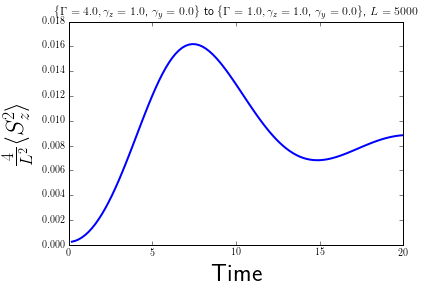

In [109]:
#plotting
plt.plot(tarr,Sz2vals_nonzero[:,-1]*(4/Larr_nonzero[-1]**2),'-',color='blue',linewidth=2,label='$\\langle S_z^2(t)+ S_y^2(t)\\rangle$')
#plt.plot(tarr,Sz2vals_nonzero,'-',color='black',linewidth=2,label='$\\langle S_z^2(t)\\rangle$')
#plt.plot(tarr,Sy2vals_nonzero,'-',color='red',linewidth=2,label='$\\langle S_y^2(t)\\rangle$')
#plt.plot(np.linspace(0,Tf,1000),Szt,color='blue',label='Holstein-Primakoff',linewidth=1.5)
#plt.axhline(Sz2inf,linestyle='dashed',color= 'black',label='$t=\\infty$ avg',linewidth=2)
plt.xlabel("Time",fontsize=25)
plt.ylabel("$\\frac{4}{L^2}\\langle S_z^2\\rangle$",fontsize=25)#"+S_y^2\\rangle$",fontsize=25)
plt.xlim(0,tarr[-1])
#plt.ylim()
#plt.legend(numpoints=1,loc=1,fontsize=15)#bbox_to_anchor=(1.5,1))
plt.title(' \\{$\Gamma=%.1f, \\gamma_z= %.1f $, $\\gamma_{y}= %.1f $\\} to \\{$\\Gamma=%.1f, \\gamma_z= %.1f $, $\\gamma_{y}= %.1f $\\},  $L=%d$'%(paramvals0.Γ,paramvals0.γz,paramvals0.γy, paramvalsf.Γ,paramvalsf.γz,paramvalsf.γy,Larr_nonzero[-1]))
figname='/home/paraj/Dropbox/Research_Projects_Current/LMG_Quench/plots/For_Mohammad/Szt_[0_'+str(dt)+'_'+str(Tf)+']_from_'+paramvals0.paramstr()+'to'+paramvalsf.paramstr()+'.pdf'

plt.savefig(figname,bbox_inches="tight")

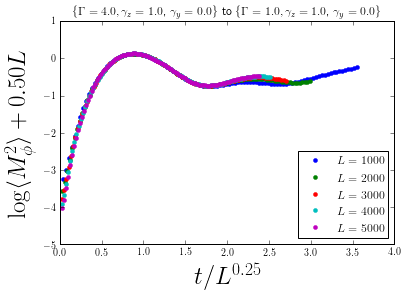

In [110]:
#plt.plot(tarr,Mϕ2vals_nonzero,'-',linewidth=2,label='$\\langle S_z^2(t)+ S_y^2(t)\\rangle$')
mz=0.5#0.36
mt=1/4#0.18
for L,p in zip(Larr_nonzero,range(np.size(Larr_nonzero))):
    plt.plot(tarr/L**mt,np.log(Mz2vals_nonzero[:,p])+mz*np.log(L),'.',markersize=8,linewidth=2,label='$L=%d$'% L)
plt.xlabel("$t/L^{ %0.2f } $"% mt,fontsize=25)
plt.ylabel("${\\rm log}\\langle M^2_\\phi \\rangle+ %0.2f {\\rmlog}L$"% mz,fontsize=25)
plt.legend(loc=4,numpoints=1)
plt.title(' \\{$\Gamma=%.1f, \\gamma_z= %.1f $, $\\gamma_{y}= %.1f $\\} to \\{$\\Gamma=%.1f, \\gamma_z= %.1f $, $\\gamma_{y}= %.1f $\\}'%(paramvals0.Γ,paramvals0.γz,paramvals0.γy, paramvalsf.Γ,paramvalsf.γz,paramvalsf.γy))

figname='/home/paraj/Dropbox/Research_Projects_Current/LMG_Quench/plots/For_Mohammad/Scaled_Szt_[0_'+str(dt)+'_'+str(Tf)+']_from_'+paramvals0.paramstr()+'to'+paramvalsf.paramstr()+'.pdf'

plt.savefig(figname,bbox_inches="tight")

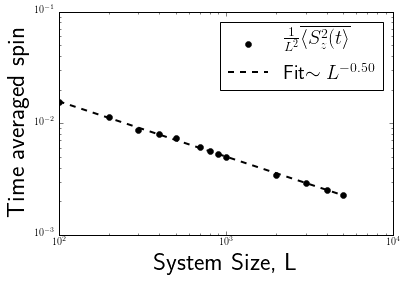

In [131]:
##numerical formulae for time-averaged value
Sztavg=np.mean(Sz2vals_nonzero, axis=0)
#linear fit to data
logSz=np.log10(np.divide(Sztavg,Larr_nonzero**2))
logL=np.log10(Larr_nonzero)
mz,bz = np.polyfit(logL,logSz, 1)

#Plot average magnetization as a function of L

#plt.loglog(Larr,np.divide(np.abs(Sz2infarr-Sztavg),(Sz2infarr)),'o')
plt.figure()
plt.loglog(Larr_nonzero,np.divide(Sztavg,Larr_nonzero**2),'ko',label='$\\frac{1}{L^2}\\overline{\\langle S_z^2(t\\rangle}$')
plt.loglog(Larr_nonzero,(10**bz)*(Larr_nonzero)**mz,'--',color='black',linewidth=2,label='Fit$\\sim L^{%0.2f}$' % mz)
plt.ylabel('Time averaged spin',fontsize=25)
plt.xlabel('System Size, L',fontsize=25)
#plt.title('Quench from  $\gamma_{z}=%0.1f$,$\gamma_{y}=%0.1f$ to  $\gamma_{z}=%0.1f$,$\gamma_{y}=%0.1f$'%{paramvals0.γz,paramvals0.γy.paramvalsf.γz,paramvalsf.γy},fontsize=25)
plt.legend(loc=1,numpoints=1,fontsize=20)
#figcaption("Quench to the critical point. It is clear that the scaling with system size is $\sim N^{-1/3}$" )
figname='/home/paraj/Dropbox/Research_Projects_Current/LMG_Quench/plots/For_Mohammad/Finitesizescaling_longtime_Szt_[0_'+str(dt)+'_'+str(Tf)+']_from_'+paramvals0.paramstr()+'to'+paramvalsf.paramstr()+'.pdf'

plt.savefig(figname,bbox_inches="tight")

In [126]:
figname='/home/paraj/Dropbox/Research_Projects_Current/LMG_Quench/plots/For_Mohammad/Finitesizescaling_Szt_[0_'+str(dt)+'_'+str(Tf)+']_from_'+paramvals0.paramstr()+'to'+paramvalsf.paramstr()+'.pdf'

In [139]:
np.zeros([1,2],dtype=complex)

array([[0.+0.j, 0.+0.j]])

In [140]:
np.arange(10,50+dt,dt)

array([10. , 10.2, 10.4, 10.6, 10.8, 11. , 11.2, 11.4, 11.6, 11.8, 12. ,
       12.2, 12.4, 12.6, 12.8, 13. , 13.2, 13.4, 13.6, 13.8, 14. , 14.2,
       14.4, 14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8, 16. , 16.2, 16.4,
       16.6, 16.8, 17. , 17.2, 17.4, 17.6, 17.8, 18. , 18.2, 18.4, 18.6,
       18.8, 19. , 19.2, 19.4, 19.6, 19.8, 20. , 20.2, 20.4, 20.6, 20.8,
       21. , 21.2, 21.4, 21.6, 21.8, 22. , 22.2, 22.4, 22.6, 22.8, 23. ,
       23.2, 23.4, 23.6, 23.8, 24. , 24.2, 24.4, 24.6, 24.8, 25. , 25.2,
       25.4, 25.6, 25.8, 26. , 26.2, 26.4, 26.6, 26.8, 27. , 27.2, 27.4,
       27.6, 27.8, 28. , 28.2, 28.4, 28.6, 28.8, 29. , 29.2, 29.4, 29.6,
       29.8, 30. , 30.2, 30.4, 30.6, 30.8, 31. , 31.2, 31.4, 31.6, 31.8,
       32. , 32.2, 32.4, 32.6, 32.8, 33. , 33.2, 33.4, 33.6, 33.8, 34. ,
       34.2, 34.4, 34.6, 34.8, 35. , 35.2, 35.4, 35.6, 35.8, 36. , 36.2,
       36.4, 36.6, 36.8, 37. , 37.2, 37.4, 37.6, 37.8, 38. , 38.2, 38.4,
       38.6, 38.8, 39. , 39.2, 39.4, 39.6, 39.8, 40

In [144]:
np.concatenate([np.linspace(10,100,10),np.linspace(150,300,4)],axis=0)

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 150.,
       200., 250., 300.])